# **Lab 5: Differential equations**
**Martin Börjeson**

# **Abstract**

In this lab I've implemented the euler forward time stepping algorithm for systems of linear equations, and tested the performance and stability of the method against well known differential equations with known exact solutions.

#**About the code**

The code is written by me, Martin Börjeson.

In [1]:
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# Report by Martin Börjeson

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [2]:
# Load neccessary modules.
import numpy as np

from matplotlib import pyplot as plt

# **Introduction**

Solving differential equations exactly can be very hard, and there is no general formula which always works. Fortunantely, there are approximative methods we can apply, which can get an answer which is close enough to the exact solution.

The different methods have different strengths and weaknesses. Some, like the Euler forward method, is very easy to implement and can work very well, but can also have small errors in previous steps explode in size if you aren't careful. Other methods, such as Runge-Kutta or a Trapezoidal Euler are less prone to such shameful displays, but none are immune from it.

In this lab, I've decided to implement the simple Euler forward method.

## **Method**



# Time stepping for scalar initial value problem $\frac{du}{dt} = f(u,t)$

Euler forward is the easiest time stepping algorithm, as it is explicit, and each successive value can be calculated from the previous one.

$U(n+1) = U(n) + \Delta f(U(n),t)$

Input: function $f(u,t)$, final time $T$, initial value $u(0)$

Output: approximation $U(t_n)$ for the time interval $[0,T]$. 

In [73]:
def euler_forward(f, T, u0, s = 1000):
  u = [u0]
  x = np.linspace(0,T,s)
  for t in x[1:]:
    u.append(u[-1] + (T/s)*f(u[-1],t))
  return u[-1], np.array(u), x

# Time stepping for a system of initial value problem $\frac{du}{dt} = f(u,t)$

Euler forward can easily be generalized for solving a system of differential equations. Its formula looks identical written down:

$U(n+1) = U(n) + \Delta f(U(n),t)$

Although $U(n)$ is now a vector, and $f(u,t)$ is a vector function, which takes the vector $u$ as argument, and returns another vector.

Amazingly, the algorithm I implemented with for scalar functions also works for systems of initial value problems, no rewrites required!

I've repackaged the original function just to write something.

Input: vector function $f(u,t)$, final time $T$, initial value vector $u(0)$

Output: approximation $U(t_n)$ for the time interval $[0,T]$. 

In [77]:
def euler_forward_vector(f, T, u0, s = 1000):
  return euler_forward(f,T,u0,s)

# **Results**

Below are a limited set of tests for the varies methods.

#Time stepping for scalar initial value problem $\frac{du}{dt} = f(u,t)$

Test: Verify stability by testing linear model problem (13.12) with different step sizes.

$\dot{u}(t) = -u(t)$

$u(0) = 1$

The explicit euler method is stable if the step size $k$ is less than 1.

Lets test the stability with k = 3 and k = 3/5

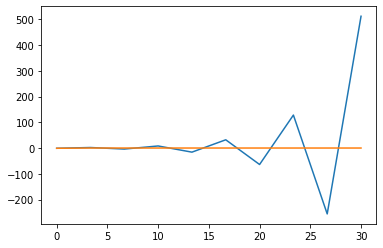

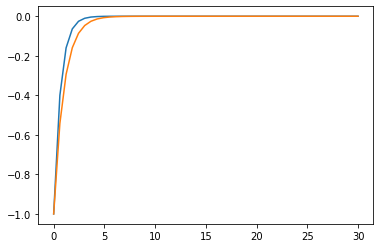

In [136]:
#TESTS:
def f(u,t):
  return -u

def fsolved(t):
  return -np.exp(-t)

#k=3
_,y,x = euler_forward(f,30,-1,10)
plt.plot(x,y)
plt.plot(x,fsolved(x))

plt.figure()
k=3/5
_,y,x = euler_forward(f,30,-1,50)
plt.plot(x,y)
plt.plot(x,fsolved(x))


This shows that the time stepping is unstable for large values of k, but for smaller it is stable. Just like the theory would suggest.

# Time stepping for a system of initial value problem $\frac{du}{dt} = f(u,t)$

Now that we have a system of equations, we can test the performance of euler forward on a harmonic oscillator system. Euler forward will not conserve the total energy of the system over time, which in this case means that we should expect the vibrations to increase over time. Something that is not present in the exact solution of the problem.

Test: Verify stability in an oscillating system

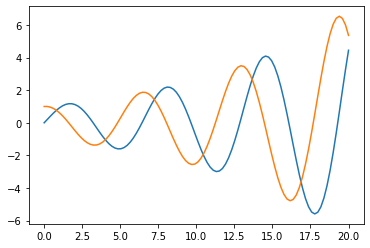

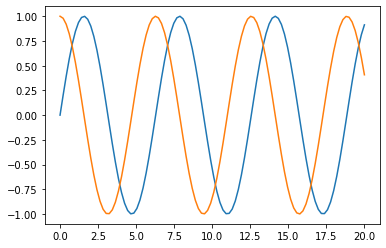

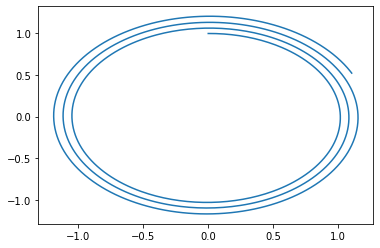

In [143]:
def g(u,t):
  return np.array([u[1], -u[0]])

def gsolved(t):
  return np.array([np.sin(t),np.cos(t)]).transpose()

_,y,x = euler_forward_vector(g,20,[0,1],100)

#Approximation, amplitude increases over time
plt.figure()
plt.plot(x,y)

#Exact, amplitude stays constant
plt.figure()
plt.plot(x,gsolved(x))

#Plotted u_1 against u_2 for fun.
plt.figure()
_,y,x = euler_forward_vector(g,20,[0,1],1000)
plt.plot(y[:,0],y[:,1])

Again, the experiment confirms the theory. The explicit euler method is not stable in this kind of system.

# **Discussion**

I chose to implement an explicit time stepping method, as the assignment was ambiguous regarding what exact type of method was to be used. The approximation works as expected, and by that I mean that it works well in some cases, and worse in other. I could lessen the negative impact of using euler forward by using a smaller step size, or implementing another, more advanced time stepping method such as Trapezoidal Euler, or even a Runge-Kutta method. This time, I chose the easier path instead...